In [1]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

# Unit 1 Capstone: Narrative Analytics & Experimentation

## 1 – Explore the Data 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("PoliceKillingsUS.csv", engine="python")

total_shootings_count = df.shape[0]
df.loc[:,'is_armed'] = df['armed'].apply(lambda x: False if x == 'unarmed' else True)

def format_year_month(date):
    nums = date.split('/')
    if len(nums) == 3:
        return '20{} - {}'.format(nums[2], nums[1])
    else:
        return None
df.loc[:,'formatted_date'] = df['date'].apply(lambda x: format_year_month(x))

def label_mentally_ill_with_no_threat_or_unarmed(row):
    if (row['signs_of_mental_illness'] == True) and (row['threat_level'] != 'attack'):
        row['mentally_ill_and_not_threat'] = True
    elif (row['signs_of_mental_illness'] == True) and (row['is_armed'] == False):
        row['mentally_ill_and_not_threat'] = True
    else:
        row['mentally_ill_and_not_threat'] = False
    return row

df = df.apply(lambda row: label_mentally_ill_with_no_threat_or_unarmed(row),axis=1)
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,is_armed,formatted_date,mentally_ill_and_not_threat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,True,2015 - 01,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,True,2015 - 01,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,False,2015 - 01,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,True,2015 - 01,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,True,2015 - 01,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,True,2015 - 01,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,True,2015 - 01,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,True,2015 - 01,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,False,2015 - 01,False
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,True,2015 - 01,False


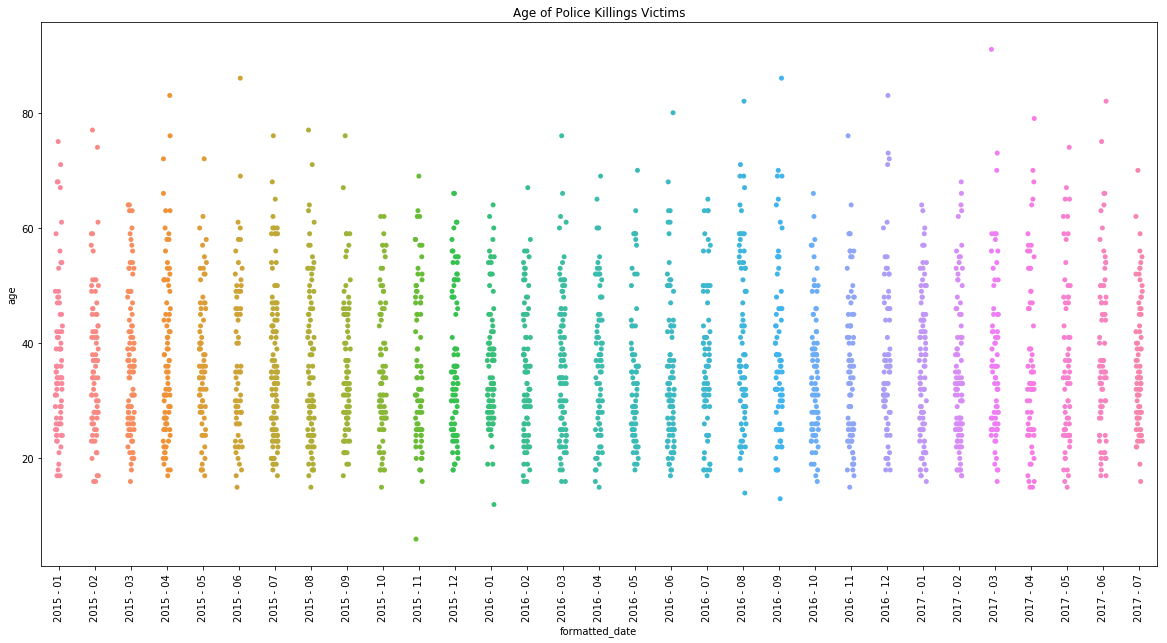

In [41]:
figure = plt.figure(figsize=(20,10))

figure.add_subplot(1, 1, 1)
g = sns.stripplot(x="formatted_date", y="age", data=df, jitter=True)
g.set_xticklabels(df['formatted_date'].unique(), rotation=90)
plt.title('Age of Police Killings Victims')
plt.show()

### Location
#### California, Texas, and Florida have experienced the most police killings from Jan 2, 2015 - July 31, 2017 (424, 225, and 154 each, respectively). Ohio and Oklahoma are tied for 4th highest number of police killings, with 76 each.

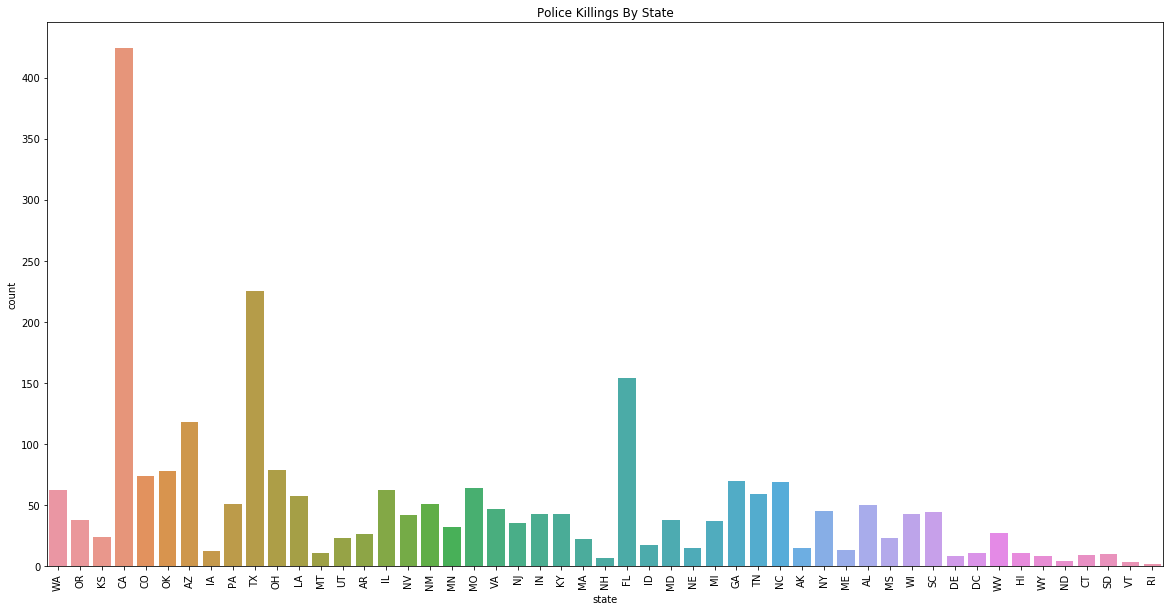

In [3]:
first_date = df['date'].unique()[0]
last_date = df['date'].unique()[-1]

figure = plt.figure(figsize=(20,10))

figure.add_subplot(1, 1, 1)
g = sns.countplot(x='state', data=df)
g.set_xticklabels(df['state'].unique(), rotation=90)
plt.title('Police Killings By State')
plt.show()

### Body Camera
#### 89.31% of all police killings were WITHOUT a body camera. 

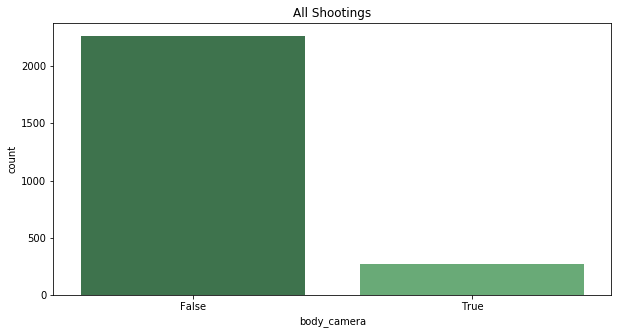

In [4]:
no_camera = df[df['body_camera'] == False]
no_camera_count = no_camera.count()['id']

has_camera = df[df['body_camera']]
has_camera_count = has_camera.count()['id']

percent_no_camera = round(no_camera_count / total_shootings_count * 100, 2)

figure = plt.figure(figsize=(10,5))

figure.add_subplot(1, 1, 1)
plt.title('All Shootings')
sns.countplot(x="body_camera", data=df, palette="Greens_d")

plt.show()

### Body Camera vs. Unarmed Victims
#### 6.75% of all police killings had unarmed victims. 84.21% of unarmed victims were killed WITHOUT a body camera.

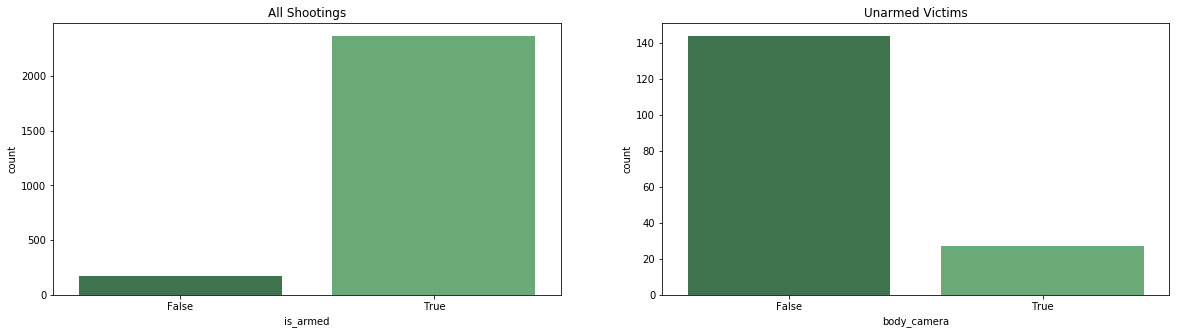

In [5]:
total_unarmed = df[df['is_armed'] == False]
total_unarmed_count = total_unarmed.count()['id']

no_camera_unarmed = no_camera[no_camera['is_armed'] == False]
no_camera_unarmed_count = no_camera_unarmed.count()['id']

has_camera_unarmed = has_camera[has_camera['is_armed'] == False]
has_camera_unarmed_count = has_camera_unarmed.count()['id']

percent_unarmed = round(total_unarmed_count / total_shootings_count * 100, 2)
percent_unarmed_no_camera = round(no_camera_unarmed_count / total_unarmed_count * 100, 2)
percent_unarmed_has_camera = round(has_camera_unarmed_count / total_unarmed_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('All Shootings')
sns.countplot(x="is_armed", data=df, palette="Greens_d")

figure.add_subplot(1, 2, 2)
plt.title('Unarmed Victims')
sns.countplot(x="body_camera", data=total_unarmed, palette="Greens_d")

plt.show()

#### 6.36% of police killings were WITHOUT a body camera had unarmed victims. 9.96% of police killings WITH a body camera had unarmed victims.

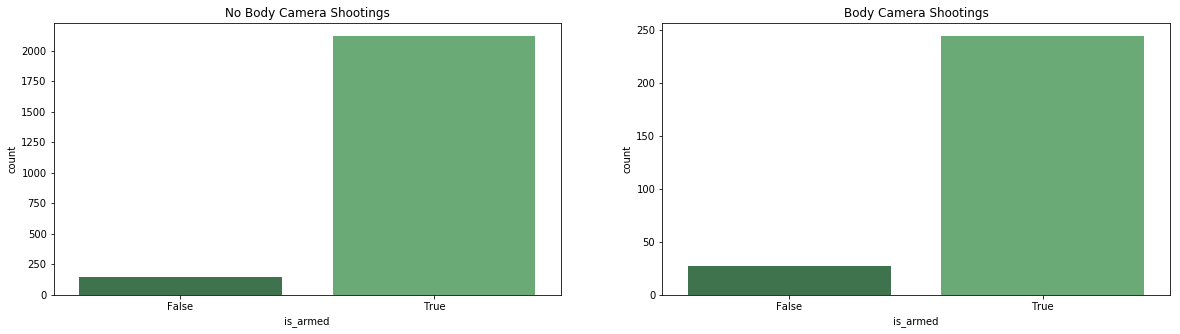

In [6]:
percent_no_camera_unarmed = round(no_camera_unarmed_count / no_camera_count * 100, 2)
percent_has_camera_unarmed = round(has_camera_unarmed_count / has_camera_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('No Body Camera Shootings')
sns.countplot(x="is_armed", data=no_camera, palette="Greens_d")

figure.add_subplot(1, 2, 2)
plt.title('Body Camera Shootings')
sns.countplot(x="is_armed", data=has_camera, palette="Greens_d")

plt.show()

### Body Camera vs. Mentally Ill Victims
#### 10.65% of all police killings had mentally ill victims who were not a threat. 87.04% of mentally ill victims who were not a threat were killed WITHOUT a body camera.

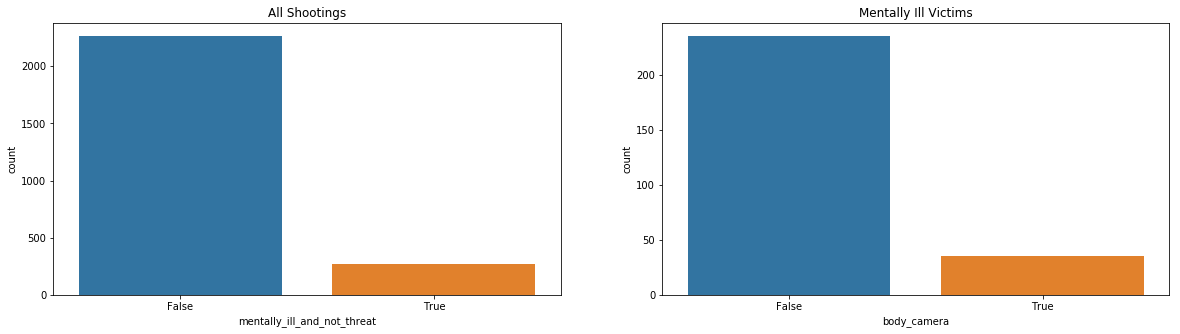

In [7]:
total_mental = df[df['mentally_ill_and_not_threat']]
total_mental_count = total_mental.count()['id']

no_camera_mental = no_camera[no_camera['mentally_ill_and_not_threat']]
no_camera_mental_count = no_camera_mental.count()['id']

has_camera_mental = has_camera[has_camera['mentally_ill_and_not_threat']]
has_camera_mental_count = has_camera_mental.count()['id']

percent_mental = round(total_mental_count / total_shootings_count * 100, 2)
percent_mental_no_camera = round(no_camera_mental_count / total_mental_count * 100, 2)
percent_mental_has_camera = round(has_camera_mental_count / total_mental_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('All Shootings')
sns.countplot(x="mentally_ill_and_not_threat", data=df)

figure.add_subplot(1, 2, 2)
plt.title('Mentally Ill Victims Who Were Not a Threat')
sns.countplot(x="body_camera", data=total_mental)
plt.show()

#### 10.38% of police killings WITHOUT a body camera had mentally ill victims who were not a threat. 12.92% of police killings WITH a body camera had mentally ill victims who were not a threat.

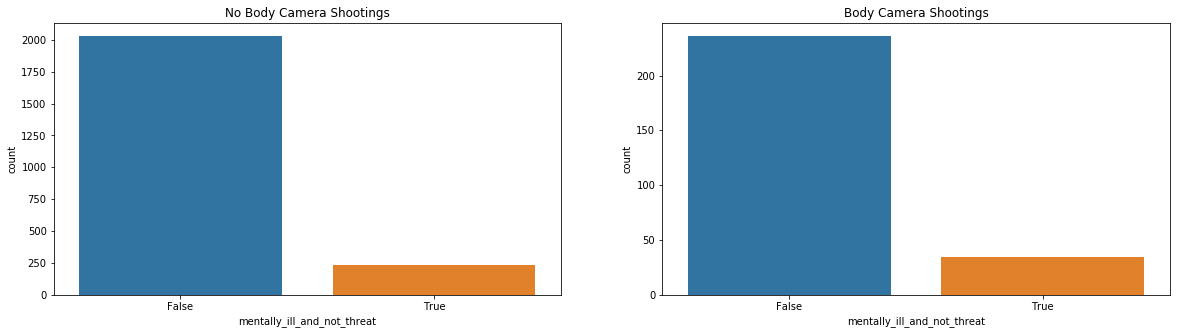

In [11]:
percent_no_camera_mental = round(no_camera_mental_count / no_camera_count * 100, 2)
percent_has_camera_mental = round(has_camera_mental_count / has_camera_count * 100, 2)

figure = plt.figure(figsize=(20,5))

figure.add_subplot(1, 2, 1)
plt.title('No Body Camera Shootings')
sns.countplot(x="mentally_ill_and_not_threat", data=no_camera)

figure.add_subplot(1, 2, 2)
plt.title('Body Camera Shootings')
sns.countplot(x="mentally_ill_and_not_threat", data=has_camera)
plt.show()

## 2 – Experimentation RFC 

using data selected, propose and outline an experiment plan. The plan should consist of 3 key components:

### Experimental Hypothesis

How can police departments decrease the number of unarmed or mentally ill suspects their officers kill? This is a pertinent issue to study and solve, not only because unjustified police killings is morally apprehensible and counter to a police officer's duty to "protect and serve", but also because such incidents decrease public trust in the police, making it more difficult for competent officers to do their job well. Furthermore, a police department must divert precious time and resources in the event of an unjustified police killing to deal with negative news coverage, rather than allocating those resources to their officers and operations. 

In related studies, researchers cite lack of officer accountability and insufficient de-escalation and mental health training as major reasons for officers shootings unarmed and mentally ill suspects.

### Potential Solution

This experiment will test the hypothesis that 1) enforcing that all police officers wear a body camera at all times, 2) increasing mandatory de-escalation training, and 3) increasing mandatory mental health training will decrease the number of unjustified police killings (i.e. of unarmed or mentally ill suspects).

### Rollout Plan 
Rolling the experiment out in states with the highest number of police killings (CA, TX, FL, OH, and OK) would ensure that any potential increase or decrease in the number of killings is more likely to be noticeable and statistically significant.

Create 3 separate groups of police departments for each proposed new action (enforcing body cameras, de-escalation training, mental health training), and ensure that each group consists of similarly sized departments (i.e. one group shouldn't have mostly large city police departments, while another has smaller town departments). 

Each group should implement their respective proposed new action for 6 months. For each proposed new action, if there is at least a 10% decrease in the number of unjustified police shootings ('unjustified' being defined as the killing of an unarmed or mentally ill suspect), roll the new action out to the rest of the state's police departments. 

If there is an additional 10% decrease in the number of unjustified police shootings among the participating departments, roll the new action out to the next 5 states with the highest number of police killings. 

If those new states' participating departments also experience at least a 10% decrease in the number of unjustified police shootings, roll the action out to the rest of the country.

### Evaluation Plan

 what constitutes success in this experiment? Your experiment should be as real as possible. Though you obviously will not have access to the full production environment to deploy your experiment, it should be feasible and of interest to the parties involved with your actual data source.

The target size of your RFC should be 3-5 pages.